In [100]:
import plotly.express as px
import pandas as pd
import os
from pathlib import Path
import requests
import json
from pandas.io.json import json_normalize


In [101]:
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Set token using Plotly Express set function
px.set_mapbox_access_token(mapbox_token)

In [102]:
type(mapbox_token)

str

In [103]:
url = "https://covidtracking.com/api/states"

In [104]:
# Add format specifier to request url
url = url + "?format=json"

In [105]:
# Execute get request
requests.get(url)

<Response [200]>

In [106]:
response_data = requests.get(url)

In [107]:
# Get content
response_content = response_data.content
response_content

b'[{"state":"AK","positive":381,"positiveScore":1,"negativeScore":1,"negativeRegularScore":1,"commercialScore":1,"grade":"A","score":4,"notes":"Please stop using the \\"total\\" field. Use \\"totalTestResults\\" instead. As of 4/24/20, \\"grade\\" is deprecated. Please use \\"dataQualityGrade\\" instead.","dataQualityGrade":"B","negative":28299,"pending":null,"hospitalizedCurrently":7,"hospitalizedCumulative":null,"inIcuCurrently":null,"inIcuCumulative":null,"onVentilatorCurrently":null,"onVentilatorCumulative":null,"recovered":328,"lastUpdateEt":"5/11 00:00","checkTimeEt":"5/11 15:46","death":10,"hospitalized":null,"total":28680,"totalTestResults":28680,"posNeg":28680,"fips":"02","dateModified":"2020-05-11T04:00:00Z","dateChecked":"2020-05-11T19:46:00Z","hash":"bd543de63eeb59b4b6923ae99245e6425054a97c"},{"state":"AL","positive":10009,"positiveScore":1,"negativeScore":1,"negativeRegularScore":0,"commercialScore":1,"grade":"B","score":3,"notes":"Please stop using the \\"total\\" field. 

In [108]:
import json

# Formatting as json
data = response_data.json()

In [109]:
# Add indents to JSON and output to screen
print(json.dumps(data, indent=4))

[
    {
        "state": "AK",
        "positive": 381,
        "positiveScore": 1,
        "negativeScore": 1,
        "negativeRegularScore": 1,
        "commercialScore": 1,
        "grade": "A",
        "score": 4,
        "notes": "Please stop using the \"total\" field. Use \"totalTestResults\" instead. As of 4/24/20, \"grade\" is deprecated. Please use \"dataQualityGrade\" instead.",
        "dataQualityGrade": "B",
        "negative": 28299,
        "pending": null,
        "hospitalizedCurrently": 7,
        "hospitalizedCumulative": null,
        "inIcuCurrently": null,
        "inIcuCumulative": null,
        "onVentilatorCurrently": null,
        "onVentilatorCumulative": null,
        "recovered": 328,
        "lastUpdateEt": "5/11 00:00",
        "checkTimeEt": "5/11 15:46",
        "death": 10,
        "hospitalized": null,
        "total": 28680,
        "totalTestResults": 28680,
        "posNeg": 28680,
        "fips": "02",
        "dateModified": "2020-05-11T04:00:00

In [110]:
# state_info_df = pd.DataFrame()
# state_info_df['state'] = pd.Series([asset.symbol for asset in assets])
data_df = pd.DataFrame(data)
data_df


checkTimeEt  commercialScore dataQualityGrade           dateChecked  \
0   5/11 15:46              1.0                B  2020-05-11T19:46:00Z   
1   5/11 16:17              1.0                B  2020-05-11T20:17:00Z   
2   5/11 16:42              1.0                A  2020-05-11T20:42:00Z   
3   5/11 14:44              1.0               A+  2020-05-11T18:44:00Z   
4   5/11 14:04              1.0                B  2020-05-11T18:04:00Z   
5   5/11 16:19              1.0                A  2020-05-11T20:19:00Z   
6   5/11 16:38              1.0                B  2020-05-11T20:38:00Z   
7   5/11 15:05              1.0                A  2020-05-11T19:05:00Z   
8   5/11 15:27              1.0                B  2020-05-11T19:27:00Z   
9   5/11 16:01              1.0               A+  2020-05-11T20:01:00Z   
10  5/11 15:48              1.0               A+  2020-05-11T19:48:00Z   
11  5/11 15:58              1.0                B  2020-05-11T19:58:00Z   
12  5/11 14:35              1.0               A+  2020-05-11T18:35:00Z   
13  5/11 16:15              1.0                B  2020-05-11T20:15:00Z   
14  5/11 16:11              1.0                A  2020-05-11T20:11:00Z   
15  5/11 14:29              0.0               A+  2020-05-11T18:29:00Z   
16  5/11 14:20              0.0                A  2020-05-11T18:20:00Z   
17  5/11 16:23              1.0               A+  2020-05-11T20:23:00Z   
18  5/11 14:15              1.0                B  2020-05-11T18:15:00Z   
19  5/11 16:34              1.0               A+  2020-05-11T20:34:00Z   
20  5/11 14:46              1.0               A+  2020-05-11T18:46:00Z   
21  5/11 14:56              1.0                B  2020-05-11T18:56:00Z   
22  5/11 16:17              1.0               A+  2020-05-11T20:17:00Z   
23  5/11 15:03              1.0                A  2020-05-11T19:03:00Z   
24  5/11 15:12              1.0                B  2020-05-11T19:12:00Z   
25  5/11 15:40              1.0                A  2020-05-11T19:40:00Z   
26  5/11 15:42              1.0                B  2020-05-11T19:42:00Z   
27  5/11 16:09              1.0                A  2020-05-11T20:09:00Z   
28  5/11 15:00              0.0                C  2020-05-11T19:00:00Z   
29  5/11 14:55              1.0                C  2020-05-11T18:55:00Z   
30  5/11 16:03              0.0                B  2020-05-11T20:03:00Z   
31  5/11 16:36              1.0               A+  2020-05-11T20:36:00Z   
32  5/11 14:40              1.0                C  2020-05-11T18:40:00Z   
33  5/11 14:46              1.0                C  2020-05-11T18:46:00Z   
34  5/11 16:38              1.0                A  2020-05-11T20:38:00Z   
35  5/11 15:17              1.0                B  2020-05-11T19:17:00Z   
36  5/11 14:51              1.0               A+  2020-05-11T18:51:00Z   
37  5/11 16:45              1.0               A+  2020-05-11T20:45:00Z   
38  5/11 15:06              1.0                C  2020-05-11T19:06:00Z   
39  5/11 15:59              0.0               A+  2020-05-11T19:59:00Z   
40  5/11 14:09              0.0                A  2020-05-11T18:09:00Z   
41  5/11 14:12              1.0                B  2020-05-11T18:12:00Z   
42  5/11 15:39              1.0                A  2020-05-11T19:39:00Z   
43  5/11 16:52              1.0                A  2020-05-11T20:52:00Z   
44  5/11 16:11              1.0                B  2020-05-11T20:11:00Z   
45  5/11 15:47              1.0               A+  2020-05-11T19:47:00Z   
46  5/11 15:40              1.0                B  2020-05-11T19:40:00Z   
47  5/11 15:25              1.0                A  2020-05-11T19:25:00Z   
48  5/11 15:36              1.0               A+  2020-05-11T19:36:00Z   
49  5/11 14:57              0.0                C  2020-05-11T18:57:00Z   
50  5/11 14:55              1.0                B  2020-05-11T18:55:00Z   
51  5/11 16:07              1.0                C  2020-05-11T20:07:00Z   
52  5/11 15:28              NaN                C  2020-05-11T19:28:00Z   
53  5/1

In [111]:
data_df = data_df.filter(['death','positive','recovered','state','total','totalTestResults'])
data_df 

death  positive  recovered state    total  totalTestResults
0      10       381      328.0    AK    28680             28680
1     401     10009        NaN    AL   129444            129444
2      94      4034     3149.0    AR    69030             69030
3     542     11380     2852.0    AZ   150241            150241
4    2770     67939        NaN    CA   991897            991897
5     981     19899     3076.0    CO   108790            108790
6    3008     33765     5413.0    CT   132508            132508
7     328      6389      881.0    DC    30261             30261
8     225      6565     2619.0    DE    31928             31928
9    1805     40982        NaN    FL   562137            561057
10   1441     33927        NaN    GA   251288            251288
11     17       632      561.0    HI    37683             37683
12    271     12373     5249.0    IA    77792             77792
13     67      2230     1473.0    ID    32142             32142
14   3459     79007        NaN    IL   442425            442425
15   1540     24627        NaN    IN   146688            146688
16    158      7116      376.0    KS    54109             54109
17    304      6440     2308.0    KY    86923             86923
18   2308     31815    22608.0    LA   220830            220830
19   5108     78462        NaN    MA   394728            394728
20   1683     33373     2298.0    MD   164780            164780
21     65      1462      872.0    ME    23554             23554
22   4584     47552    22686.0    MI   298948            298948
23    591     11799     7536.0    MN   115781            115781
24    488      9918        NaN    MO   115620            115620
25    435      9674     6268.0    MS    95885             95885
26     16       459      423.0    MT    22572             22572
27    550     15045     9115.0    NC   195865            195865
28     36      1518      846.0    ND    47014             47014
29     98      8315        NaN    NE    46239             46239
30    133      3160     1229.0    NH    35144             34883
31   9310    139945    15642.0    NJ   425933            425933
32    200      4863     1285.0    NM   102498            102498
33    306      6152      183.0    NV    60084             60084
34  21640    337055    58363.0    NY  1204651           1204651
35   1357     24777        NaN    OH   210530            210530
36    274      4613     3241.0    OK    95992             95992
37    130      3286     1125.0    OR    77606             77606
38   3731     57154        NaN    PA   288858            288858
39    430     11450      841.0    RI    93332             93332
40    331      7653     4120.0    SC    84457             84457
41     34      3614     2187.0    SD    24578             24578
42    251     15544     8038.0    TN   273277            273277
43   1100     39869    21713.0    TX   525697            525697
44     68      6362     3181.0    UT   150585            150585
45    850     25070     3273.0    VA   151049            150617
46     53       926      785.0    VT    20871             20871
47    931     16891        NaN    WA   248875            248875
48    409     10418     5176.0    WI   118631            118451
49     54      1366      775.0    WV    63469             63469
50      7       662      443.0    WY    12065             12065
51    113      2256        NaN    PR     2256              2256
52      0         0        NaN    AS      105               105
53      5       151      124.0    GU     3989              3989
54      2        19       12.0    MP     2695              2695
55      5        69       60.0    VI     1215              1179

In [112]:
states_df = pd.read_csv(Path("../Resources/states.csv")).drop_duplicates()
states_df

state   latitude   longitude                  name
0     AK  63.588753 -154.493062                Alaska
1     AL  32.318231  -86.902298               Alabama
2     AR  35.201050  -91.831833              Arkansas
3     AZ  34.048928 -111.093731               Arizona
4     CA  36.778261 -119.417932            California
5     CO  39.550051 -105.782067              Colorado
6     CT  41.603221  -73.087749           Connecticut
7     DC  38.905985  -77.033418  District of Columbia
8     DE  38.910832  -75.527670              Delaware
9     FL  27.664827  -81.515754               Florida
10    GA  32.157435  -82.907123               Georgia
11    HI  19.898682 -155.665857                Hawaii
12    IA  41.878003  -93.097702                  Iowa
13    ID  44.068202 -114.742041                 Idaho
14    IL  40.633125  -89.398528              Illinois
15    IN  40.551217  -85.602364               Indiana
16    KS  39.011902  -98.484246                Kansas
17    KY  37.839333  -84.270018              Kentucky
18    LA  31.244823  -92.145024             Louisiana
19    MA  42.407211  -71.382437         Massachusetts
20    MD  39.045755  -76.641271              Maryland
21    ME  45.253783  -69.445469                 Maine
22    MI  44.314844  -85.602364              Michigan
23    MN  46.729553  -94.685900             Minnesota
24    MO  37.964253  -91.831833              Missouri
25    MS  32.354668  -89.398528           Mississippi
26    MT  46.879682 -110.362566               Montana
27    NC  35.759573  -79.019300        North Carolina
28    ND  47.551493 -101.002012          North Dakota
29    NE  41.492537  -99.901813              Nebraska
30    NH  43.193852  -71.572395         New Hampshire
31    NJ  40.058324  -74.405661            New Jersey
32    NM  34.972730 -105.032363            New Mexico
33    NV  38.802610 -116.419389                Nevada
34    NY  43.299428  -74.217933              New York
35    OH  40.417287  -82.907123                  Ohio
36    OK  35.007752  -97.092877              Oklahoma
37    OR  43.804133 -120.554201                Oregon
38    PA  41.203322  -77.194525          Pennsylvania
39    PR  18.220833  -66.590149           Puerto Rico
40    RI  41.580095  -71.477429          Rhode Island
41    SC  33.836081  -81.163725        South Carolina
42    SD  43.969515  -99.901813          South Dakota
43    TN  35.517491  -86.580447             Tennessee
44    TX  31.968599  -99.901813                 Texas
45    UT  39.320980 -111.093731                  Utah
46    VA  37.431573  -78.656894              Virginia
47    VT  44.558803  -72.577841               Vermont
48    WA  47.751074 -120.740139            Washington
49    WI  43.784440  -88.787868             Wisconsin
50    WV  38.597626  -80.454903         West Virginia
51    WY  43.075968 -107.290284               Wyoming

In [113]:
data_df.set_index('state', inplace=True)
states_df.set_index('state', inplace=True)

In [114]:
states_df.head()

latitude   longitude        name
state                                   
AK     63.588753 -154.493062      Alaska
AL     32.318231  -86.902298     Alabama
AR     35.201050  -91.831833    Arkansas
AZ     34.048928 -111.093731     Arizona
CA     36.778261 -119.417932  California

In [115]:
joined_df = pd.concat([states_df, data_df], axis='columns', join='inner')
joined_df

latitude   longitude                  name  death  positive  \
state                                                                 
AK     63.588753 -154.493062                Alaska     10       381   
AL     32.318231  -86.902298               Alabama    401     10009   
AR     35.201050  -91.831833              Arkansas     94      4034   
AZ     34.048928 -111.093731               Arizona    542     11380   
CA     36.778261 -119.417932            California   2770     67939   
CO     39.550051 -105.782067              Colorado    981     19899   
CT     41.603221  -73.087749           Connecticut   3008     33765   
DC     38.905985  -77.033418  District of Columbia    328      6389   
DE     38.910832  -75.527670              Delaware    225      6565   
FL     27.664827  -81.515754               Florida   1805     40982   
GA     32.157435  -82.907123               Georgia   1441     33927   
HI     19.898682 -155.665857                Hawaii     17       632   
IA     41.878003  -93.097702                  Iowa    271     12373   
ID     44.068202 -114.742041                 Idaho     67      2230   
IL     40.633125  -89.398528              Illinois   3459     79007   
IN     40.551217  -85.602364               Indiana   1540     24627   
KS     39.011902  -98.484246                Kansas    158      7116   
KY     37.839333  -84.270018              Kentucky    304      6440   
LA     31.244823  -92.145024             Louisiana   2308     31815   
MA     42.407211  -71.382437         Massachusetts   5108     78462   
MD     39.045755  -76.641271              Maryland   1683     33373   
ME     45.253783  -69.445469                 Maine     65      1462   
MI     44.314844  -85.602364              Michigan   4584     47552   
MN     46.729553  -94.685900             Minnesota    591     11799   
MO     37.964253  -91.831833              Missouri    488      9918   
MS     32.354668  -89.398528           Mississippi    435      9674   
MT     46.879682 -110.362566               Montana     16       459   
NC     35.759573  -79.019300        North Carolina    550     15045   
ND     47.551493 -101.002012          North Dakota     36      1518   
NE     41.492537  -99.901813              Nebraska     98      8315   
NH     43.193852  -71.572395         New Hampshire    133      3160   
NJ     40.058324  -74.405661            New Jersey   9310    139945   
NM     34.972730 -105.032363            New Mexico    200      4863   
NV     38.802610 -116.419389                Nevada    306      6152   
NY     43.299428  -74.217933              New York  21640    337055   
OH     40.417287  -82.907123                  Ohio   1357     24777   
OK     35.007752  -97.092877              Oklahoma    274      4613   
OR     43.804133 -120.554201                Oregon    130      3286   
PA     41.203322  -77.194525          Pennsylvania   3731     57154   
PR     18.220833  -66.590149           Puerto Rico    113      2256   
RI     41.580095  -71.477429          Rhode Island    430     11450   
SC     33.836081  -81.163725        South Carolina    331      7653   
SD     43.969515  -99.901813          South Dakota     34      3614   
TN     35.517491  -86.580447             Tennessee    251     15544   
TX     31.968599  -99.901813                 Texas   1100     39869   
UT     39.320980 -111.093731                  Utah     68      6362   
VA     37.431573  -78.656894              Virginia    850     25070   
VT     44.558803  -72.577841               Vermont     53       926   
WA     47.751074 -120.740139            Washington    931     16891   
WI     43.784440  -88.787868             Wisconsin    409     10418   
WV     38.597626  -80.454903         West Virginia     54      1366   
WY     43.075968 -107.290284               Wyoming      7       662   

       recovered    total  totalTestResults  
state                                        
AK         328.0    28680             28680  
AL           NaN   129444          

In [116]:
data_to_plot = joined_df[["latitude", "longitude", "total", "name"]]
# filtered_data = df[df["StateDesc"] == "California"]

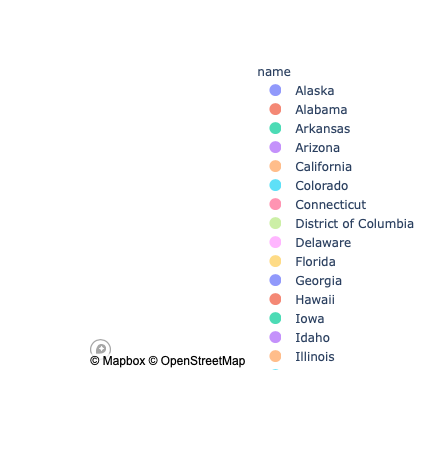

In [117]:
px.scatter_mapbox(
    data_to_plot,
    lat="latitude",
    lon="longitude",
    size="total",
    color="name",
)

In [123]:
joined_df.reset_index(inplace=True)
joined_df.head()

state   latitude   longitude        name  death  positive  recovered  \
0    AK  63.588753 -154.493062      Alaska     10       381      328.0   
1    AL  32.318231  -86.902298     Alabama    401     10009        NaN   
2    AR  35.201050  -91.831833    Arkansas     94      4034     3149.0   
3    AZ  34.048928 -111.093731     Arizona    542     11380     2852.0   
4    CA  36.778261 -119.417932  California   2770     67939        NaN   

    total  totalTestResults  
0   28680             28680  
1  129444            129444  
2   69030             69030  
3  150241            150241  
4  991897            991897

In [124]:
import plotly.graph_objects as go

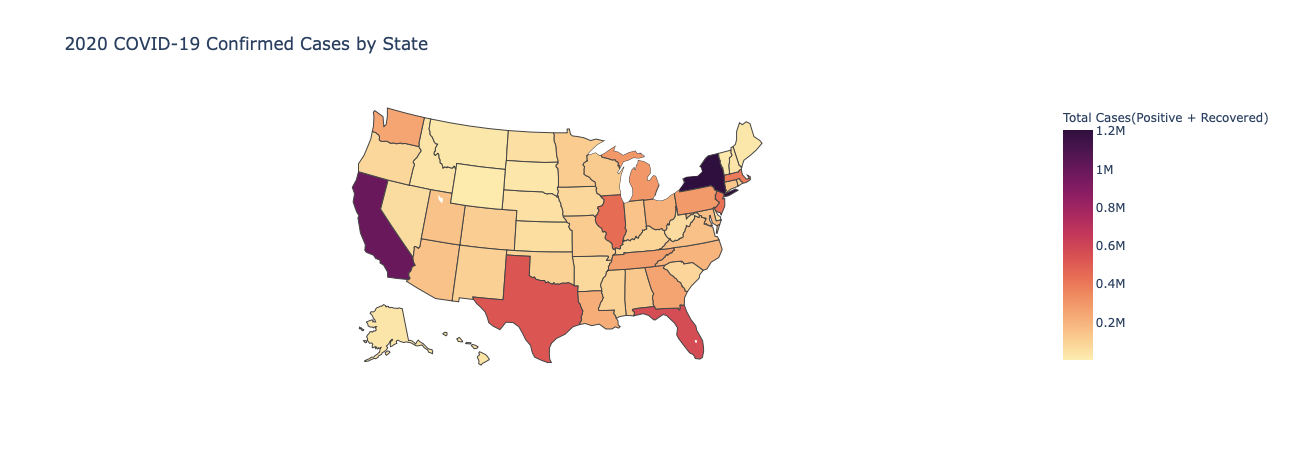

In [129]:
fig = go.Figure(data=go.Choropleth(
    locations=joined_df['state'], # Spatial coordinates
    z = joined_df['total'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Matter',
    colorbar_title = "Total Cases(Positive + Recovered)",
))

fig.update_layout(
    title_text = '2020 COVID-19 Confirmed Cases by State',
    geo_scope='usa',# limite map scope to USA
    mapbox_style="carto-positron"
)

fig.show()